# Project Name EDA and Statistical Analysis of Mod Clothing Dataset


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from scipy import stats
from scipy.stats import randint
from scipy.stats import skewnorm
from math import factorial
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare
import warnings
warnings.filterwarnings('ignore')

# PART-A ( Concept Based)--25 points

#### The following data represents the price in dollars for branded shirts in a website NuCloth

In [2]:
df=pd.DataFrame({'price':[23,30,20,27,44,26,35,20,29,29,
                          25,15,18,27,19,22,12,26,34,15,
                          27,35,26,43,35,14,24,12,23,31,
                          40,35,38,57,22,42,24,21,27,33]})
df.head()

,price
0,23
1,30
2,20
3,27
4,44


## Q1. Compute the mean, median and the mode of the data

In [3]:
# mean
mean=df['price'].mean()
print('The mean of the price is ',mean)

# median
median=df['price'].median()
print('The median of the price is ',median)


# mode
mode=df['price'].mode()
print('The mode of the price is \n',mode)

The mean of the price is  27.625
The median of the price is  26.5
The mode of the price is 
 0    27
1    35
Name: price, dtype: int64


## Q2. Compute the range , variance and standard deviation of the data

In [4]:
# Range
ran=df['price'].max()-df['price'].min()
print('The range of the price is ',ran)


# Varince
var=df['price'].var()
print('The variance of the price is ',var)


# standard deviation
sd=df['price'].std()
print('The standard deviation of the price is ',sd)

The range of the price is  45
The variance of the price is  92.59935897435898
The standard deviation of the price is  9.622856071580774


## Q3. Find the mean deviation for the data 

In [5]:
mean=np.mean(df['price'])
n=len(df)
mean_deviation=sum(np.abs(df['price']-mean)/n)
print('mean deviation: ',mean_deviation)

mean deviation:  7.400000000000001


## Q4. Calculate the Pearson coefficient of skewness and comment on the skewness of the data

In [6]:
x_bar=np.mean(df['price'])
s=np.std(df['price'],ddof=1)
md=df['price'].median()
skewness=3*(x_bar-md)/s
print(f" The calculated skewness is {skewness}")

 The calculated skewness is 0.3507274737245009


## Q5. Count the number of data values that fall within two standard deviations of the mean. Compare this with the answer from Chebyshev’s Theorem.


In [7]:
# According to Chebyshev's Theorem, atleast 75% of the data lies between 2 standard deviations

In [8]:
right_sd=np.mean(df['price'])+(2*np.std(df['price']))
left_sd=np.mean(df['price'])-(2*np.std(df['price']))
print('left_sd ',left_sd)
print('right_sd ',right_sd)

left_sd  8.621381923433631
right_sd  46.62861807656637


In [9]:
count=len(df[(df['price']<=right_sd) & (df['price']>=left_sd)])
print(count,'data values that fall within two standard deviations of the mean')

percentage=(count/len(df))*100
print(round(percentage,3), 'percentage of data values that fall within two standard deviations of the mean')

39 data values that fall within two standard deviations of the mean
97.5 percentage of data values that fall within two standard deviations of the mean


## Q6. Find the three quartiles and the interquartile range (IQR).

In [10]:
q1=df['price'].quantile(0.25)
q2=df['price'].quantile(0.50)
q3=df['price'].quantile(0.75)
IQR=q3-q1
print('The first quantile is: ',q1)
print('The second quantile is: ',q2)
print('The third quantile is: ',q3)
print('The Interquartile range is: ',IQR)

The first quantile is:  21.75
The second quantile is:  26.5
The third quantile is:  34.25
The Interquartile range is:  12.5


## Q7. Are there any outliers in the data set ?

In [11]:
ll=q1-1.5*IQR
ul=q3+1.5*IQR
df[(df['price']<ll) | (df['price']>ul)]

,price
33,57


## Q8. Draw a boxplot of the dataset to confirm .

<AxesSubplot:xlabel='price'>

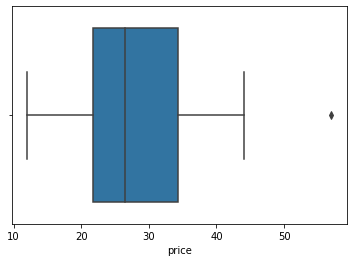

In [12]:
sns.boxplot(df['price'])

## Q9. Find the percentile rank of the datapoint 25.

In [13]:
df['rank']=df['price'].rank(pct=True)*100
df[df['price']==25]

,price,rank
10,25,42.5


## Q10. What is the probability that a shirt cost is above 25 dollars?

In [14]:
favourable_outcome=len(df[df['price']>25])
print('favourable_outcome: ',favourable_outcome)
Total_outcome=len(df)
print('total_outcome: ',Total_outcome)

# probability
prob=favourable_outcome/Total_outcome
print("The probability that a  that a shirt cost is above 25 dollars is  ",prob)

favourable_outcome:  23
total_outcome:  40
The probability that a  that a shirt cost is above 25 dollars is   0.575


## Q11. Create a frequency distribution for the data and visualize it appropriately

<AxesSubplot:xlabel='price', ylabel='Count'>

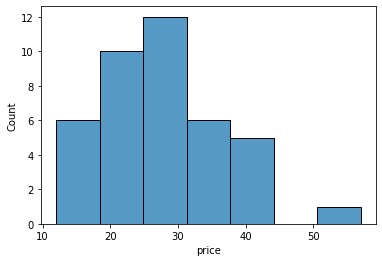

In [15]:
sns.histplot(df['price'])

## Q12. Create a probability distribution of the data and visualize it appropriately.

<AxesSubplot:xlabel='price', ylabel='Density'>

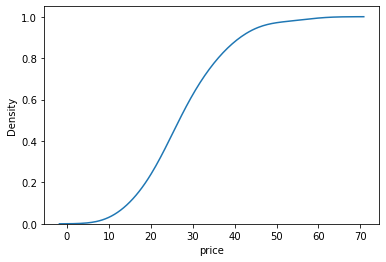

In [16]:
sns.kdeplot(df['price'],cumulative=True)

## Q13. What is the shape of the distribution of this dataset? Create an appropriate graph to determine that. Take 100 random samples with replacement from this dataset of size 5 each. Create a sampling distribution of the mean shirt prices. Compare with other sampling distributions of sample size 10, 15, 20, 25, 30. State your observations. Does it corroborate the Central Limit Theorem?

In [17]:
#shape of the distribution of this dataset
df['price'].shape

(40,)

<AxesSubplot:xlabel='price', ylabel='Count'>

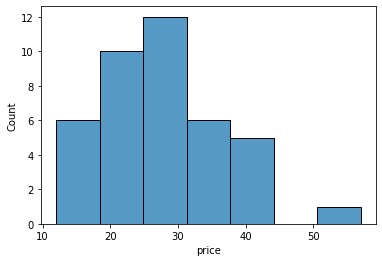

In [16]:
sns.histplot(df['price'])

In [18]:
def sampling_distribution(x,no_of_sample,sample_size):
    sample_mean_list=[]
    for i in range(no_of_sample):
        sample=np.random.choice(x,size=sample_size,replace=True)
        sample_mean=np.mean(sample)
        sample_mean_list.append(sample_mean)
    return sample_mean_list

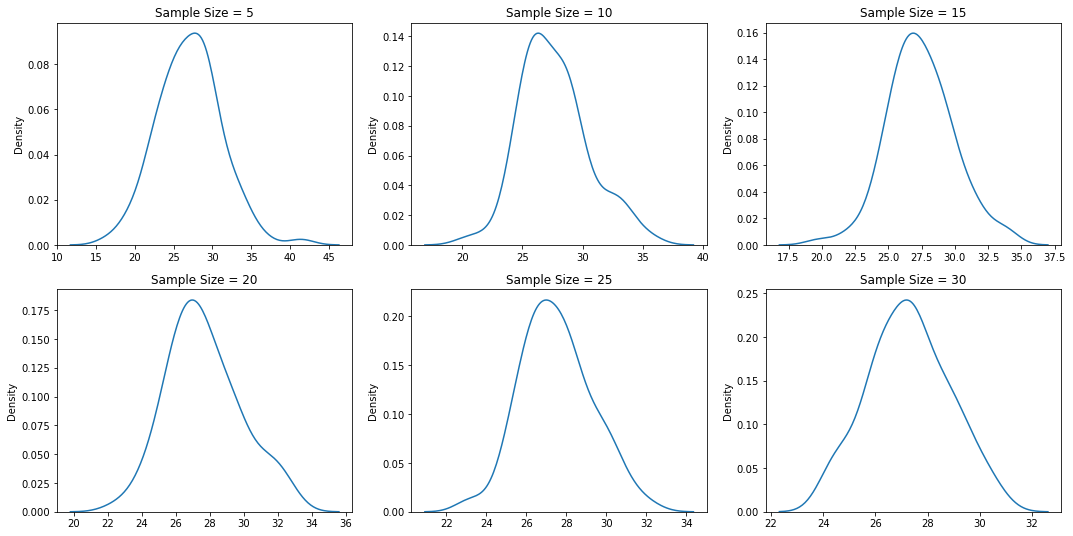

In [19]:
plt.figure(figsize=(18,9))
plt.subplot(2,3,1)
sns.kdeplot(x=sampling_distribution(df['price'],100,5))
plt.title("Sample Size = 5")
plt.subplot(2,3,2)
sns.kdeplot(x=sampling_distribution(df['price'],100,10))
plt.title("Sample Size = 10")
plt.subplot(2,3,3)
sns.kdeplot(x=sampling_distribution(df['price'],100,15))
plt.title("Sample Size = 15")
plt.subplot(2,3,4)
sns.kdeplot(x=sampling_distribution(df['price'],100,20))
plt.title("Sample Size = 20")
plt.subplot(2,3,5)
sns.kdeplot(x=sampling_distribution(df['price'],100,25))
plt.title("Sample Size = 25")
plt.subplot(2,3,6)
sns.kdeplot(x=sampling_distribution(df['price'],100,30))
plt.title("Sample Size = 30")
plt.show()

## Q14. Treat this dataset as a binomial distribution where p is the probability that a shirt costs above 25 dollars. What is the probability that out of a random sample of 10 shirts 7 are costing more than 25 dollars?


In [18]:
x=len(df[df['price']>25])
n=10
p=x/len(df)
prob=stats.binom.pmf(7,n,p)
print('The probability that out of a random sample of 10 shirts 7 are costing more than 25 dollars is  ',round(prob,4))

The probability that out of a random sample of 10 shirts 7 are costing more than 25 dollars is   0.1914


## Q15. NuCloth Claims that 60% of all shirts in their website cost less than 25 dollars . Using the Normal approximation of a Binomial distribution, find the probability that in a random sample of 10 shirts 7 of them will cost less than 25 dollars.
[ Note that the normal distribution can be used to approximate a binomial 
distribution if np>=5 and nq>=5 with the following correction for continuity
P(X=z) = P(z-0.5 < X < z+0.5 ) ]



In [19]:
n=10
x=7
print(f"The probability that out of a random sample of 100 young adults were exactly 50 are having BMI greater than 25 is {stats.binom.pmf(x,n,p)}")

The probability that out of a random sample of 100 young adults were exactly 50 are having BMI greater than 25 is 0.19143570809682064


## Q16. Compute a 95% Confidence Interval for the true price of a shirt in the NuCloth website using appropriate distribution.( State reasons as to why did you use a z or t distribution)

In [82]:
# mean, standard deviation
x=np.mean(df['price'])
sd=np.std(df['price'],ddof=1)
n=len(df)

# alpha
c=0.95
alpha=1-c

# z_alpha
z_alpha=stats.norm.isf(alpha/2)

# confidence interval
me=(z_alpha*sd)/(np.sqrt(n))
ci=x-me,x+me
print('The confidence interval for the true price of a shirt in the NuCloth website ',ci)

The confidence interval for the true price of a shirt in the NuCloth website  (24.642900805126224, 30.607099194873776)


## Q17. A data scientist wants to estimate with 95% confidence the true proportion of shirts having price greater than 25 dollars in the NuCloth website. A recent study showed that 60% of all shirts have a price greater than 25 dollars. The data scientist wants to be accurate within 2% of the true proportion. Find the minimum sample size necessary.


In [213]:
# alpha
ci=0.95
alpha=1-ci

# z_alpha
z_alpha=stats.norm.isf(alpha/2)

sd=np.std(df['price'],ddof=1)
p=0.6
me=0.02
q=1-p
n=len(df)

#sample size
n=(z_alpha*np.sqrt(p*q)/me)**2
print('the minimum sample size is  ',round(n))

the minimum sample size is   2305


## Q18. The same data scientist wants to estimate the true proportion of shirts having price greater than 25 dollars. She wants to be 90% confident and accurate within 5% of true proportion. Find the minimum sample size necessary.

In [214]:
ci=0.90
alpha=1-ci

# z_alpha
z_alpha=stats.norm.isf(alpha/2)

me=0.05
p=0.6
q=1-p

#sample size
n=(z_alpha*np.sqrt(p*q)/me)**2
print('the minimum sample size is  ',round(n))

the minimum sample size is   260


## Q19. NuCloth claims that currently 80% of all shirts have prices greater than 25 dollars . Test this claim with an alpha =0.05 if out of a random sample of 30 shirts only 23 are having prices above 25 dollars.

In [92]:
# alpha
alpha=0.05

# z_alpha
z_alpha=stats.norm.ppf(alpha/2)
print('z_alpha: ',round(z_alpha,3))

# Data
n=30
x=23
p=x/n
q=1-p
p0=80/100


# z statistics
z=(p-p0)/np.sqrt((p0*(1-p0))/n)
print(f"Z statistic = {round(z,3)}")

z_alpha:  -1.96
Z statistic = -0.456


## Q20. A data scientist is researching the hypothesis that the average price of a shirt in NuCloth is higher than the supermarket. So he collects data from NuCloth and the supermarket that the average shirt price of shirts in NuCloth is 36 dollars vs 34 dollars in the supermarket. The standard deviations are 7.6 and 5.8 respectively.Suppose the data scientist got these values after randomly selecting 100 shirts from each place.







### a. What hypothesis would he use to compare the shirt prices of NuCloth vs Supermarket

### b. What are critical values to be used?

In [20]:
x1=36
x2=34
sd1=7.6
sd2=5.8
n1=100
n2=100
alpha=0.05

### c. What statistical test will be used to compare these prices?

### d. Complete the test and obtain the P-value.

In [22]:
#alpha
alpha=0.05
print('alpha:',alpha)


#z_alpha
z_alpha=stats.norm.isf(alpha)
print('z_alpha: ',z_alpha)

# z calculation
z=(x1-x2)/np.sqrt(((sd1**2)/n1)+((sd2**2)/n2))
print('z: ',z)

# p_value
p_value=stats.norm.sf(z)
print('p_value: ',p_value)

alpha: 0.05
z_alpha:  1.6448536269514729
z:  2.09197696327652
p_value:  0.018220288245112185


### e. Summarize his conclusion based on the P-value.

# PART-B ( Dataset Based)--25 points

## 1. Read the datasets, Check the data types and Change the data types appropriately.

In [24]:
#Read the datasets
df=pd.read_json('modcloth_final_data.json',lines=True)
df.head()

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


In [25]:
#Check the data types
df.dtypes

item_id             int64
waist             float64
size                int64
quality           float64
cup size           object
hips              float64
bra size          float64
category           object
bust               object
height             object
user_name          object
length             object
fit                object
user_id             int64
shoe size         float64
shoe width         object
review_summary     object
review_text        object
dtype: object

In [26]:
# Change the data types appropriately.
df['item_id']=df['item_id'].astype('O')
df['user_id']=df['user_id'].astype('O')
df.dtypes

item_id            object
waist             float64
size                int64
quality           float64
cup size           object
hips              float64
bra size          float64
category           object
bust               object
height             object
user_name          object
length             object
fit                object
user_id            object
shoe size         float64
shoe width         object
review_summary     object
review_text        object
dtype: object

## 2. Change the height column datatype to float after converting the values as shown
Below. 5.7

In [27]:
df['height']=list(map(lambda x : str(x).replace(' ','.').replace('ft','').replace('in',''),df['height']))
df['height']=df['height'].astype(float)
df['height'].dtype

dtype('float64')

## 3. Rename the names of the columns which have space in between the column.
Ex: shoe size as shoe_size etc.

In [28]:
df=df.rename(columns={'cup size':'cup_size','bra size':'bra_size','shoe size':'shoe_size','shoe width':'shoe_width'})
df.head(2)

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5.6,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5.2,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN


## 4. Check the missing values and Identify the distribution of the variables to impute the missing values. Explain based on your analysis decide the features which can be  dropped and Which can be imputed. And also explain the reason to choose the metric that you have chosen to impute the null values.

## Note: Kindly copy the datasets and work on the new data frame.

In [29]:
df1=df.copy()
df1.head()

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5.6,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5.2,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5.7,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5.2,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


### 4.1 Check the count and percentage of missing values.

In [30]:
#count of missing values
df1.isnull().sum()

item_id               0
waist             79908
size                  0
quality              68
cup_size           6255
hips              26726
bra_size           6018
category              0
bust              70936
height             1107
user_name             0
length               35
fit                   0
user_id               0
shoe_size         54875
shoe_width        64183
review_summary     6725
review_text        6725
dtype: int64

In [31]:
(df1.isna().sum())/len(df1)*100

item_id            0.000000
waist             96.518903
size               0.000000
quality            0.082136
cup_size           7.555260
hips              32.281677
bra_size           7.268994
category           0.000000
bust              85.681846
height             1.337118
user_name          0.000000
length             0.042276
fit                0.000000
user_id            0.000000
shoe_size         66.282160
shoe_width        77.525063
review_summary     8.122962
review_text        8.122962
dtype: float64

### 4.2 check the Mean and Median.

In [32]:
#mean
df1.mean()

item_id      469325.229170
waist            31.319223
size             12.661602
quality           3.949058
hips             40.358501
bra_size         35.972125
height            5.456365
user_id      498849.564718
shoe_size         8.145818
dtype: float64

In [33]:
#median
df1.median()

item_id      454030.0
waist            30.0
size             12.0
quality           4.0
hips             39.0
bra_size         36.0
height            5.5
user_id      497913.5
shoe_size         8.0
dtype: float64


### 4.3 Check the distribution of the variables using Histogram or Dist plot or KDE  and boxplot etc. 
#### Kindly explore at least two

Text(0.5, 1.0, 'Distribution of height variable')

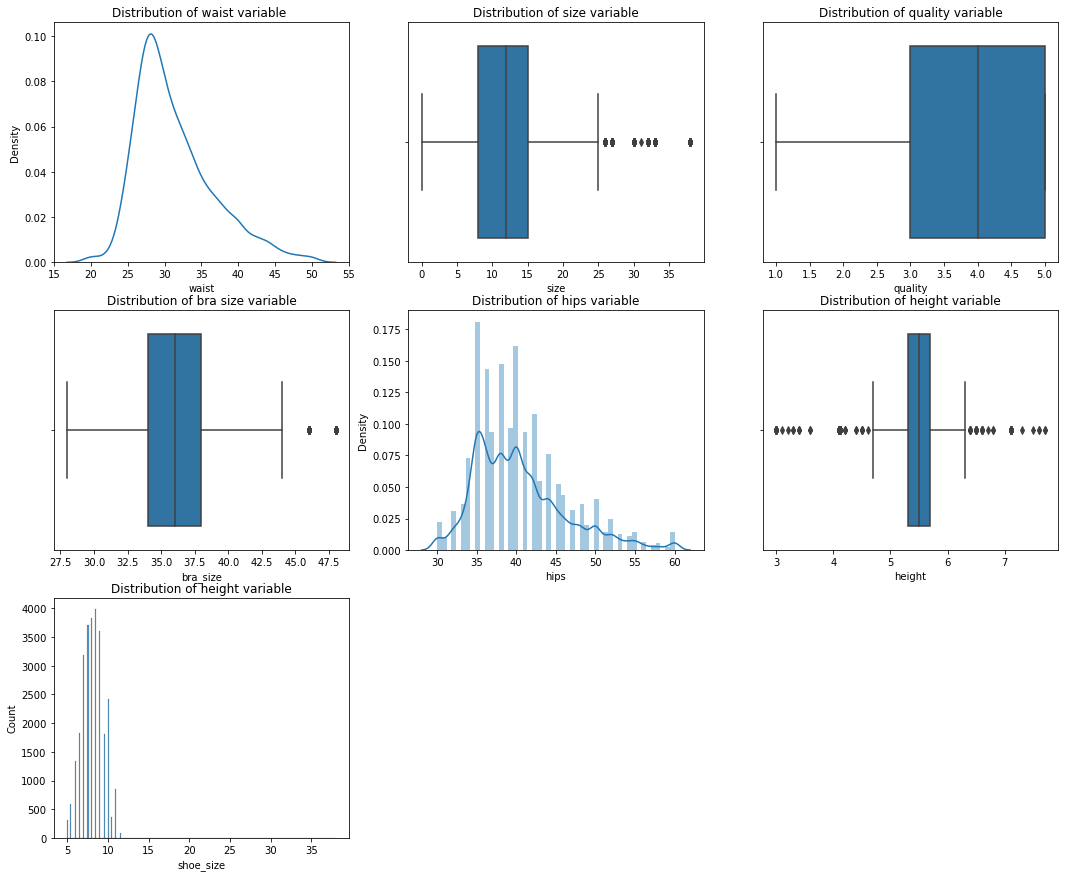

In [35]:
plt.figure(figsize=(18,15))
plt.subplot(3,3,1)
sns.kdeplot(df1['waist'])
plt.title("Distribution of waist variable ")
plt.subplot(3,3,2)
sns.boxplot(df1['size'])
plt.title("Distribution of size variable")
plt.subplot(3,3,3)
sns.boxplot(df1['quality'])
plt.title("Distribution of quality variable")
plt.subplot(3,3,4)
sns.boxplot(df1['bra_size'])
plt.title("Distribution of bra size variable")
plt.subplot(3,3,5)
sns.distplot(df1['hips'])
plt.title("Distribution of hips variable")
plt.subplot(3,3,6)
sns.boxplot(df1['height'])
plt.title("Distribution of height variable")
plt.subplot(3,3,7)
sns.histplot(df1['shoe_size'])
plt.title("Distribution of height variable")

### 4.4 Check the Skewness and Kurtosis.
#### Explain what the Skewness and Kurtosis describe.

In [36]:
#skewness
print('Skewness of the variable :')
df.skew()

Skewness of the variable :


item_id     -0.120644
waist        0.993061
size         1.128301
quality     -0.676777
hips         0.969187
bra_size     0.901004
height      -1.095275
user_id      0.008201
shoe_size    0.436713
dtype: float64

In [37]:
#Kurtorsis
print('Kurtorsis of the variable :')
df.kurt()

Kurtorsis of the variable :


item_id     -1.215909
waist        0.836624
size         0.760010
quality     -0.167085
hips         0.848464
bra_size     1.039445
height       5.311308
user_id     -1.182436
shoe_size    8.448820
dtype: float64

*skewness:*
Skewness refers to the degree of symmetry, or more precisely, the degree of lack of symmetry.The value of the coefficient if skewness usually ranges from –3 to 3.
1. When the distribution is symmetric, the coefficient is zero
2. when the distribution is positively skewed , the coefficient is positive
3. when the distribution is negatively skewed the coefficient is negative. 

*Kurtosis:*
Kurtosis refers to the proportion of data that is heavy-tailed or light-tailed in comparison with a normal distribution.
1. When k>0 it is said to be leptokurtic
2. When k=0 it is said to be mesokurtic
3. When k<0 it is said to be platykurtic.


### 4.5 Based on the above approach impute the missing values with the right  metric. Or If you want to get some analysis before imputing missing values feel free to explore the analysis.

<AxesSubplot:>

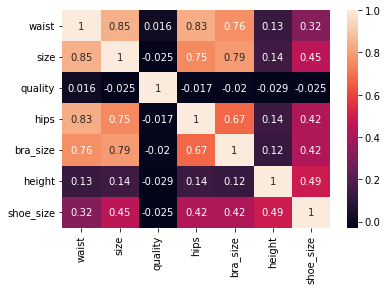

In [38]:
sns.heatmap(df1.corr(),annot=True)

In [39]:
(df1.isna().sum())/len(df1)*100

item_id            0.000000
waist             96.518903
size               0.000000
quality            0.082136
cup_size           7.555260
hips              32.281677
bra_size           7.268994
category           0.000000
bust              85.681846
height             1.337118
user_name          0.000000
length             0.042276
fit                0.000000
user_id            0.000000
shoe_size         66.282160
shoe_width        77.525063
review_summary     8.122962
review_text        8.122962
dtype: float64

In [40]:
# waist,bust column has above 80 % of null-values so we drop that column
df1.drop(columns=['waist','bust'],inplace=True)

### quality column

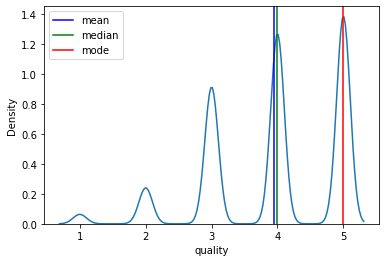

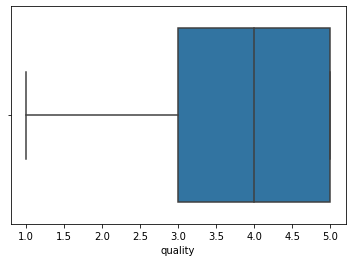

In [41]:
sns.kdeplot(df1['quality'])
plt.axvline(df1['quality'].mean(),color='b',label='mean')
plt.axvline(df1['quality'].median(),color='g',label='median')
plt.axvline(df1['quality'].mode()[0],color='r',label='mode')
plt.legend()
plt.show()
sns.boxplot(df1['quality'])
plt.show()

In [42]:
# quality column has 0.8% has null-values and it doesnt have outlier so we replacing it with median
df1['quality']=df1['quality'].fillna(df1['quality'].median())

### cup size column

In [43]:
# cup_size column has 7.5 % of missing values 
# its catergorial so we fill by mode
df1['cup_size']=df1['cup_size'].fillna(df1['cup_size'].mode()[0])

#### Definition function for the filling missing values by grouping with different feature

In [44]:
def fill_nan(x,col_to_be_filled,grouped_by_col,dict_groupedkeys_mean_median_values):
    for i in x[col_to_be_filled]:
        if str(i)!="nan":
            continue
        elif str(i)=="nan":
            for j in x[grouped_by_col]:
                for z in dict_groupedkeys_mean_median_values.keys():
                    if j==z:
                        x[col_to_be_filled]=x[col_to_be_filled].fillna(dict_groupedkeys_mean_median_values[j])

### hips column

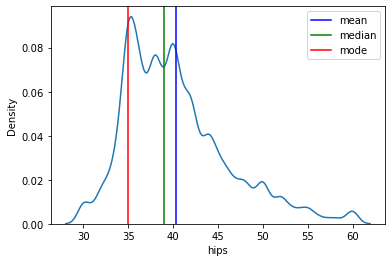

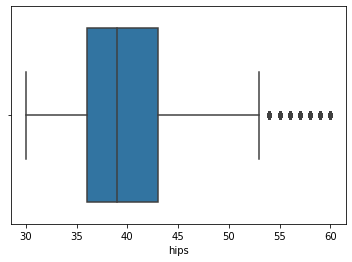

In [45]:
sns.kdeplot(df1['hips'])
plt.axvline(df1['hips'].mean(),color='b',label='mean')
plt.axvline(df1['hips'].median(),color='g',label='median')
plt.axvline(df1['hips'].mode()[0],color='r',label='mode')
plt.legend()
plt.show()
sns.boxplot(df1['hips'])
plt.show()

In [ ]:
# hips column has 32.2 % of missing values 
# we fill the missing value by using definition function created above using size column because hips and size is highly correlated.
hips_median=df.groupby("size")["hips"].median()
hips_median_dict=dict(hips_median)
fill_nan(df1,"hips","size",hips_median_dict)

### After filling the missing values of hip column

In [ ]:
sns.kdeplot(df1['hips'])

### Bra size column

### before filling null values

In [ ]:
sns.kdeplot(df1['bra_size'])
plt.axvline(df1['bra_size'].mean(),color='b',label='mean')
plt.axvline(df1['bra_size'].median(),color='g',label='median')
plt.axvline(df1['bra_size'].mode()[0],color='r',label='mode')
plt.legend()
plt.show()
sns.boxplot(df1['bra_size'])
plt.show()

In [ ]:
# bra_size column has 7.2 % of missing values 
# we fill the missing value by using definition function created above using size column because bra size and size is highly correlated.
bra_size_medians=df1.groupby("size")["bra_size"].median()
bra_size_dict=dict(bra_size_medians)
fill_nan(df1,"bra_size","size",bra_size_dict)

### After filling the missing values of bra size variable

In [ ]:
sns.kdeplot(df1['bra_size'])

## Height variable

### before filling missing values

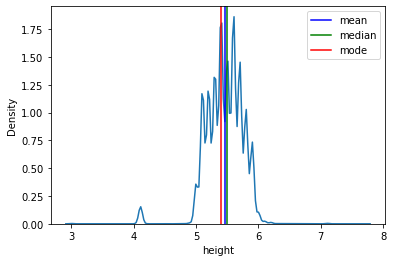

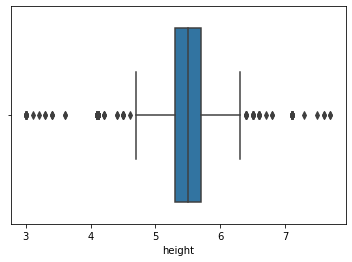

In [30]:
sns.kdeplot(df1['height'])
plt.axvline(df1['height'].mean(),color='b',label='mean')
plt.axvline(df1['height'].median(),color='g',label='median')
plt.axvline(df1['height'].mode()[0],color='r',label='mode')
plt.legend()
plt.show()
sns.boxplot(df1['height'])
plt.show()

In [31]:
# # height column has 1.33 % of missing values 
# we fill by median
df1['height']=df1['height'].fillna(df1['height'].median())

### lenght variable

In [32]:
# # lenght column has 0.042 % of missing values 
# we fill by mode
df1['length']=df1['length'].fillna(df1['length'].mode()[0])

### shoe size variable

### before filling the missing values

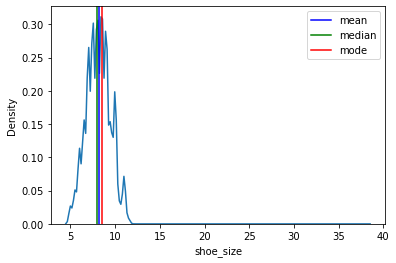

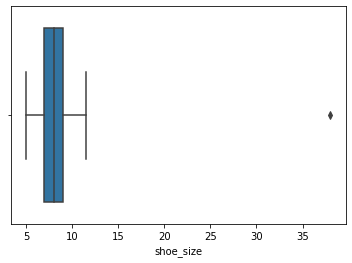

In [33]:
sns.kdeplot(df1['shoe_size'])
plt.axvline(df1['shoe_size'].mean(),color='b',label='mean')
plt.axvline(df1['shoe_size'].median(),color='g',label='median')
plt.axvline(df1['shoe_size'].mode()[0],color='r',label='mode')
plt.legend()
plt.show()
sns.boxplot(df1['shoe_size'])
plt.show()

In [35]:
#  column has 66.28 % of missing values 
# we fill by the missing value by using definition function created above using size column because shoe size and height is highly correlated.
shoe_size_medians=df1.groupby("height")["shoe_size"].median()
shoe_size_dict=dict(shoe_size_medians)
fill_nan(df1,"shoe_size","height",shoe_size_dict)

### review_summary and review_text variable

In [36]:
# review_summary and review_text columns has 8.122 % each of missing values 
# we fill by no review as there is no review received from that customer.
df1[['review_summary','review_text']]=df1[['review_summary','review_text']].fillna('no review')

In [37]:
df1['shoe_width'].unique()

array([nan, 'wide', 'average', 'narrow'], dtype=object)

In [38]:
df1.isna().sum()

item_id               0
size                  0
quality               0
cup_size              0
hips                  0
bra_size              0
category              0
height                0
user_name             0
length                0
fit                   0
user_id               0
shoe_size             0
shoe_width        64183
review_summary        0
review_text           0
dtype: int64

In [40]:
df1.groupby('shoe_width')['shoe_size'].median()

shoe_width
average    8.0
narrow     8.0
wide       8.5
Name: shoe_size, dtype: float64

## 5. Find the outliers which are below and above 2.5 * IQR - Q1 and 2.5 * IQR + Q3. 

In [41]:
l=['size','quality','hips','bra_size','height','shoe_size']
for i in l:
        q1=df1[i].quantile(0.25)
        q3=df1[i].quantile(0.75)
        IQR=q3-q1
        ll=2.5*IQR-q1
        ul=2.5*IQR+q3
        o=len(df1[(df1[i]<ll) | (df1[i]>ul)])
        print(f"The outliers of {i} column is {o}")

The outliers of size column is 38474
The outliers of quality column is 1344
The outliers of hips column is 3243
The outliers of bra_size column is 0
The outliers of height column is 31
The outliers of shoe_size column is 9132


## 6.  Check for the category dress review and visualize the top 10 reviews using any relevant plot. Identify the negative reviews if there are any.

In [42]:
dress=df1[df1['category']=='dresses'][['category','review_summary']]

<AxesSubplot:>

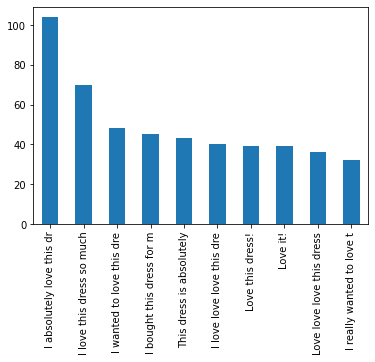

In [43]:
dress['review_summary'].value_counts().head(10).plot(kind='bar')

## 7. Find out the average shoe size for the different fits of the customer. Visualize using any relevant plot. Explain that, Is there any significant different shoe sizes for different fits?

In [44]:
df1.groupby('fit')['shoe_size'].mean()

fit
fit      8.363893
large    8.399954
small    8.434060
Name: shoe_size, dtype: float64

<AxesSubplot:xlabel='fit'>

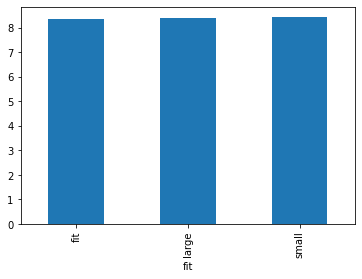

In [45]:
df1.groupby('fit')['shoe_size'].mean().plot(kind='bar')

## 8. Identify the customer’s common shoe width and average size for those who  purchased the maximum quality. Is the mode of shoe width affect the user review? Visualize using the appropriate plot.

In [46]:
max_qual=df1[df1['quality']==5]
common_shoe_width=max_qual['shoe_width'].mode()[0]
average_size=max_qual['shoe_size'].mean()
print(f"The customer’s common shoe width is {common_shoe_width} category and average size is {average_size} for those who purchased the maximum quality.")

The customer’s common shoe width is average category and average size is 8.360728279962167 for those who purchased the maximum quality.


In [61]:
common_shoe_width_review=df1[df1['shoe_width']==df1['shoe_width'].mode()[0]]

<AxesSubplot:xlabel='shoe_width', ylabel='shoe_size'>

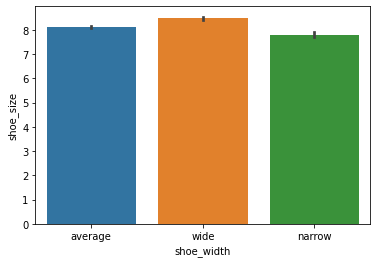

In [50]:
sns.barplot(max_qual['shoe_width'],max_qual['shoe_size'])

## 9. Extract the records belonging to the top 10 reviews, and then find the review summary for the different cup sizes. The basic analysis explains what you would try to infer. Try to use visualization.

## 10. Identify the most common review that we got from the customer whose hips size  is greater than 35. Find out what kind of inference you can make.

In [309]:
a=df1[df1['hips']>35]                                
a['review_summary'].mode()[0]

'no review'

In [310]:
a=df[df['hips']>35]                                
a['review_summary'].mode()[0]

'Love it!'

## 11. What is the relationship between height and weight? Describe what kind of relationship it has.

## 12. Plot the pair plot for the numerical plot. Explain according to your problem statement how the pair plot would help you.

Problem Statement:
Let’s assume you are working as a data scientist in a newly started textile company. 
You have given a dataset that consists of most of the features related to the 
measurements, clothes types, Product ID, User ID, etc. Now you suppose to work the 
dataset to identify the patterns to understand the customer’s preferred brands and how 
the company needs to brand its products based on the patterns that you will be found 
them out. Explore all the EDA concepts you learned and use a statistical test to ensure 
that your identification is true or false.


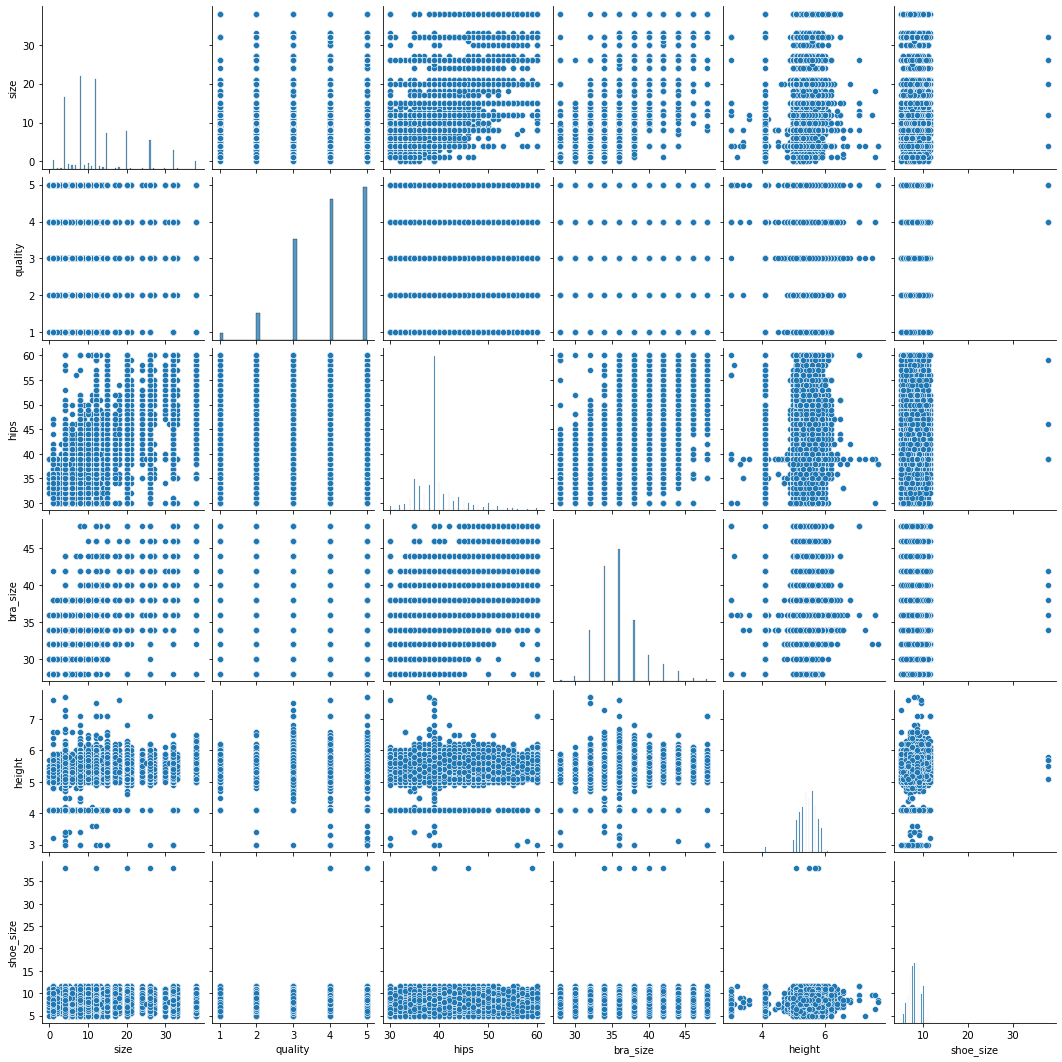

In [304]:
num=df1.select_dtypes(include=['int64','float64']).columns
sns.pairplot(df1[num])

In [303]:
df1.dtypes

item_id            object
size                int64
quality           float64
cup_size           object
hips              float64
bra_size          float64
category           object
height            float64
user_name          object
length             object
fit                object
user_id            object
shoe_size         float64
shoe_width         object
review_summary     object
review_text        object
dtype: object

# Statistical Analysis:

## 1. Test the claim that the category feature and review summary have any  relationship among them. The level of significance is 5%.

In [74]:
obs_value=pd.crosstab(df1['category'],df1['review_summary'])
obs_value

review_summary,!,!!!,!!!!,#4 for me! I'm collecting,#FashionDeux Absolutely,#FashionDeux This is the,#FashionDeux I have been,#FashionDeux This skirt i,#Review ContestAlthough t,#ReviewContest,...,you have it in other colo,you know who this dress d,you may see similar cardi,you need every color,you should buy every colo,you shouldn't have to spe,yup.,yup. This coat is amazing,"zipper stuck a little, bu",zipper very difficult to
category,,,,,,,,,,,,,,,,,,,,,
bottoms,1,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
dresses,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
new,0,0,0,0,0,1,0,0,1,1,...,0,0,0,0,1,0,0,0,1,0
outerwear,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
sale,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tops,1,1,0,1,0,0,0,0,0,0,...,1,0,1,1,0,0,1,0,0,0
wedding,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
# alpha
alpha=0.05
print('alpha: ',round(alpha,3))


# chi_critical
chi_critical=stats.chi2.isf(alpha,df=(61714-1)*(7-1))
print('chi_critical',chi_critical)

# test_statistics, p_value
test_stat, p_value, dof, expected_value=stats.chi2_contingency(obs_value,correction=False)
print('Test statistics:',test_stat)
print('p_value: ',p_value)

alpha:  0.05
chi_critical 371694.62417313165
Test statistics: 428976.38584409567
p_value:  0.0


## 2. Test statistically whether the size and hips have any relationship using 0.05 alpha. Before the above test, Test the normality test.

In [92]:
#Check fot normality using shapiro.
# h0: data is normal
# ha: data is not normal
print('The shapiro of size variable is\n',stats.shapiro(df1['size']))
print('The shapiro of Hips variable is\n',stats.shapiro(df1['hips']))
alpha=0.05
print('alpha: ',alpha)

The shapiro of size variable is
 ShapiroResult(statistic=0.8811834454536438, pvalue=0.0)
The shapiro of Hips variable is
 ShapiroResult(statistic=0.8368343114852905, pvalue=0.0)
alpha:  0.05


In [129]:
# decision criteria
alpha=0.05
z_alpha=stats.norm.isf(alpha/2)
print('alpha: ',alpha)
print('z_alpha: ',z_alpha)

# sample statistics
x1=np.mean(df1['size'])
x2=np.mean(df1['hips'])
sd1=np.std(df1['size'],ddof=1)
sd2=np.std(df1['hips'],ddof=1)
n1=len(df1['size'])
n2=len(df1['hips'])

#z calculation
z=(x1-x2)/np.sqrt(((sd1**2)/n1)+((sd2**2)/n2))
print('z: ',z)

#p_value
p_value=stats.norm.sf(alpha)
print('p_value: ',(p_value*2))

alpha:  0.05
z_alpha:  1.9599639845400545
z:  -790.2774797641302
p_value:  0.960122388323255


## 3. Does the quality significantly differ for any one shoe width? Test the test with 96%confidence intervals.
Check the normality of the data before the above test. Alpha = .05

In [115]:
# alpha for nomality check
alpha=0.05


# data separation
df_w=df1[df1['shoe_width']=='wide']['quality']
df_a=df1[df1['shoe_width']=='average']['quality']
df_n=df1[df1['shoe_width']=='narrow']['quality']

# shapiro test
stat_w,p_value_w=stats.shapiro(df_w)
stat_a,p_value_a=stats.shapiro(df_a)
stat_n,p_value_n=stats.shapiro(df_n)
print("p_value of wide category is",p_value_w)
print("p_value of average category is",p_value_a)
print("p_value of narrow category is",p_value_n)


# levene test 
lev_test=stats.levene(df_a,df_n,df_w)
print('levene test: ',lev_test)
print('alpha:',alpha)

p_value of wide category is 0.0
p_value of average category is 0.0
p_value of narrow category is 3.396777072946923e-37
levene test:  LeveneResult(statistic=2.2639147140981035, pvalue=0.1039714160014336)
alpha: 0.05


In [118]:
#alpha
ci=0.96
alpha=1-ci
t=df1['shoe_width'].nunique()
n=len(df1)

# f_alpha
f_alpha=stats.f.isf(alpha,dfn=t-1,dfd=n-t
                   )
print('f_alpha: ',f_alpha)

#f-one way anova test
f_stats,f_p_value=stats.f_oneway(df_a,df_n,df_w)
print('f_statistics: ',f_stats)
print('f_p_value',f_p_value)
print('alpha:',alpha)

f_alpha:  3.219000982698367
f_statistics:  4.942314890619981
f_p_value 0.007147430293019869
alpha: 0.040000000000000036


## 4. Check if the shoe width feature affects the review summary with a 99% confidence interval.

In [80]:
# observed value
obs_value=pd.crosstab(df1['shoe_width'],df1['review_summary'])
obs_value

review_summary,#FashionDeux I have been,#FashionDeux This skirt i,#Review ContestAlthough t,#ReviewContest I don't,#ReviewContest I wish,#ReviewContest Love th,#ReviewContest Super c,#ReviewContest Can't st,#ReviewContest I love t,#ReviewContest I wasn't,...,what a gorgeous coat it,wish I had sized down. fe,wish it was a tad longer,with all the reviews and,wore larger than last sea,worth the investment! fi,you could probably size d,you know who this dress d,yup.,yup. This coat is amazing
shoe_width,,,,,,,,,,,,,,,,,,,,,
average,1,1,1,1,1,4,1,1,1,1,...,1,1,1,1,1,0,0,1,1,1
narrow,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
wide,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [119]:
# alpha
ci=0.99
alpha=1-ci
print('alpha: ',round(alpha,3))


# chi_critical
chi_critical=stats.chi2.isf(alpha,df=(15487-1)*(3-1))
print('chi_critical',chi_critical)

# test_statistics, p_value
test_stat, p_value, dof, expected_value=stats.chi2_contingency(obs_value,correction=False)
print('Test statistics:',test_stat)
print('p_value: ',p_value)

alpha:  0.01
chi_critical 31553.933886861574
Test statistics: 265428.2368633073
p_value:  4.082761135352812e-147


## 5. Check if the length feature affects the review summary with a 95% confidence interval.

In [84]:
# observed value
obs_value=pd.crosstab(df1['length'],df1['review_summary'])
obs_value

review_summary,!,!!!,!!!!,#4 for me! I'm collecting,#FashionDeux Absolutely,#FashionDeux This is the,#FashionDeux I have been,#FashionDeux This skirt i,#Review ContestAlthough t,#ReviewContest,...,you have it in other colo,you know who this dress d,you may see similar cardi,you need every color,you should buy every colo,you shouldn't have to spe,yup.,yup. This coat is amazing,"zipper stuck a little, bu",zipper very difficult to
length,,,,,,,,,,,,,,,,,,,,,
just right,1,1,1,1,1,0,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
slightly long,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
slightly short,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
very long,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
very short,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
# alpha
ci=0.95
alpha=1-ci
print('alpha: ',round(alpha,3))


# chi_critical
chi_critical=stats.chi2.isf(alpha,df=(61714-1)*(5-1))
print('chi_critical',chi_critical)

# test_statistics, p_value
test_stat, p_value, dof, expected_value=stats.chi2_contingency(obs_value,correction=False)
print('Test statistics:',test_stat)
print('p_value: ',p_value)

alpha:  0.05
chi_critical 248008.87706995953
Test statistics: 265428.2368633073
p_value:  4.082761135352812e-147


## 6. Does the average quality significantly differ for the different fits? Kindly test the relevant hypothesis test by having 0.05 alpha.
Check the normality of the data before the above test. Alpha = .05

In [125]:
#alpha
alpha=0.05
t=df1['fit'].nunique()
n=len(df1)

# data separation
df_s=df1[df1['fit']=='small']['quality']
df_f=df1[df1['fit']=='fit']['quality']
df_l=df1[df1['fit']=='large']['quality']

# shapiro test
stat_s,p_value_s=stats.shapiro(df_s)
stat_f,p_value_f=stats.shapiro(df_f)
stat_l,p_value_l=stats.shapiro(df_l)
print("p_value of small category is",p_value_s)
print("p_value of fit category is",p_value_f)
print("p_value of large category is",p_value_l)

# levene test 
lev_test=stats.levene(df_s,df_f,df_l)
print('levene test: ',lev_test)
print('alpha:',alpha)

p_value of small category is 0.0
p_value of fit category is 0.0
p_value of large category is 0.0
levene test:  LeveneResult(statistic=342.34369998891185, pvalue=8.57964985101422e-149)
alpha: 0.05


In [126]:
# f_alpha
f_alpha=stats.f.isf(alpha,dfn=t-1,dfd=n-t)
print('f_alpha: ',f_alpha)

#f-one way anova test
f_stats,f_p_value=stats.f_oneway(df_s,df_f,df_l)
print('f_statistics: ',f_stats)
print('f_p_value',f_p_value)
print('alpha:',alpha)

f_alpha:  2.995840679937145
f_statistics:  2146.2393752903026
f_p_value 0.0
alpha: 0.05
